# DEEPLEARNING
## Keras

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import pandas as pd
from functions import pathfile

In [3]:
pf=pathfile()
df=pd.read_csv(pf)

C:\Users\ingva\OneDrive\Documents\EstudioML\data\raw\winequality-red.csv


In [4]:

df.shape

(1599, 12)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [45]:
#modelo
input_shape=[len(df.iloc[:,0:11].columns)]
model= keras.Sequential([layers.Dense(units=1,input_shape=input_shape)])
w, b = model.weights

print("Weights\n{}\n\nBias\n{}".format(w, b))


Weights
<KerasVariable shape=(11, 1), dtype=float32, path=sequential_9/dense_9/kernel>

Bias
<KerasVariable shape=(1,), dtype=float32, path=sequential_9/dense_9/bias>


In [47]:
model.get_weights()


[array([[-0.00060302],
        [ 0.4345315 ],
        [-0.37941757],
        [-0.45825356],
        [ 0.34401947],
        [ 0.18073982],
        [ 0.10086298],
        [ 0.13300633],
        [ 0.54825467],
        [ 0.18129772],
        [-0.5895521 ]], dtype=float32),
 array([0.], dtype=float32)]

In [52]:
#creamos training y valid data
df_train=df.sample(frac=0.7,random_state=0)
df_valid=df.drop(df_train.index)

#scale 0.1
max_=df_train.max(axis=0)
min_=df_valid.min(axis=0)
df_train=(df_train-min_)/(max_-min_)
df_valid=(df_valid-min_)/(max_-min_)

#splits
X_train=df_train.drop('quality',axis=1)
X_valid=df_valid.drop('quality',axis=1)
y_train=df_train['quality']
y_valid=df_valid['quality']



In [55]:

#creamos el modelo
model2=keras.Sequential([layers.Dense(512,activation='relu',input_shape=input_shape),
                         layers.Dense(512,activation='relu'),
                         layers.Dense(512,activation='relu'),
                         layers.Dense(1)])
model2.compile( optimizer='adam',loss='mae')

In [56]:
history=model2.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=256,epochs=10)

Epoch 1/10


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.3471 - val_loss: 0.1352
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1327 - val_loss: 0.1210
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1213 - val_loss: 0.1219
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1116 - val_loss: 0.1104
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1137 - val_loss: 0.1118
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1076 - val_loss: 0.1052
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1040 - val_loss: 0.1033
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1012 - val_loss: 0.1019
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1042 - val_loss: 0.1043
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1016 - val_loss: 0.1071


<Axes: >

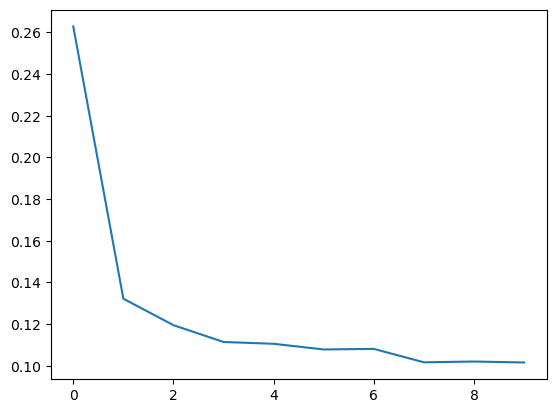

In [61]:
from IPython.display import display

history_df=pd.DataFrame(history.history)
history_df['loss'].plot()